## Importing Libraries

Pipeline:
What are going to cover:

Build 2 kinds of CustomDataset
    * Using torchvision.datasets.ImageFolder
    * Using torch.utils.Dataset

*`torchvision.datasets.ImageFolder`*

1. Build Custom Image dataset by using `torchvision.datasets.ImageFolder`. 
2. Create transform function
3. Create DataLoader from datasets
4. Visualize the data




In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets,transforms
import os
import pathlib
import requests
import zipfile

In [2]:
# Check whether the file is available or not, if not then download
from pathlib import Path

#check whether file the already exists or not
outer_folder = Path('data')
image_path = outer_folder/'pizza_steak_sushi'

if image_path.is_dir():
    print(f"The file already exists")
else:
    print("the file doesn't exist. Try to download ......")
    image_path.mkdir(parents = True, exist_ok=True)
    
    with open(image_path/"pizza_steak_sushi.zip",'wb') as f:
        
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza steak sushi data.....")
        f.write(request.content)
    
    # Unzip pizza steak sushi zip
    with zipfile.ZipFile(image_path/"pizza_steak_sushi.zip",'r') as zip_ref:
        print("Unzipping pizza steak sushi zip.....")
        zip_ref.extractall(image_path)
        

The file already exists


In [3]:
import os

for dir_paths,dir_names,file_names in os.walk(image_path):
    print(f"There are {len(dir_names)} directories and {len(file_names)} in {dir_paths}")

There are 2 directories and 1 in data/pizza_steak_sushi
There are 3 directories and 1 in data/pizza_steak_sushi/test
There are 0 directories and 19 in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 in data/pizza_steak_sushi/test/pizza
There are 3 directories and 0 in data/pizza_steak_sushi/train
There are 0 directories and 75 in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 in data/pizza_steak_sushi/train/pizza


## Train & Test directory



In [4]:
train_dir = image_path/'train'
test_dir = image_path/'test'

In [5]:
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [6]:
image_path

PosixPath('data/pizza_steak_sushi')

In [7]:
## Convert the directories into list
img_path_list = list(image_path.glob('*/*/*.jpg'))

In [8]:
len(img_path_list)

300

In [9]:
train_img_list = list(train_dir.glob("*/*.jpg"))
test_img_list = list(test_dir.glob("*/*.jpg"))

In [10]:
len(train_img_list),len(test_img_list)

(225, 75)

In [11]:
first_img = train_img_list[0]

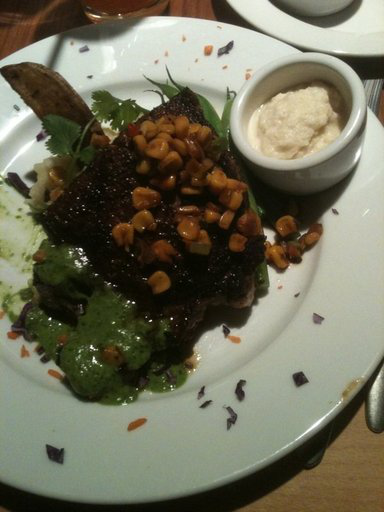

In [12]:
from PIL import Image
Image.open(first_img)

In [13]:
## Get the class name from the list name
img_class = first_img.parent.stem

In [14]:
img_class

'steak'

In [15]:
type(first_img)

pathlib.PosixPath

In [16]:
'''# The full process in a row

# 1. Got the directory first
# 2. make a list from the directory
img_list = list(image_path.glob('*/*/*.jpg'))

# 3. after that assign a variable to get a particular item from the image list
img = img_list[0] # img is the path of a specific image
# 4. Declare the class name of the image
img_class = img.parent.stem'''

"# The full process in a row\n\n# 1. Got the directory first\n# 2. make a list from the directory\nimg_list = list(image_path.glob('*/*/*.jpg'))\n\n# 3. after that assign a variable to get a particular item from the image list\nimg = img_list[0] # img is the path of a specific image\n# 4. Declare the class name of the image\nimg_class = img.parent.stem"

(-0.5, 511.5, 511.5, -0.5)

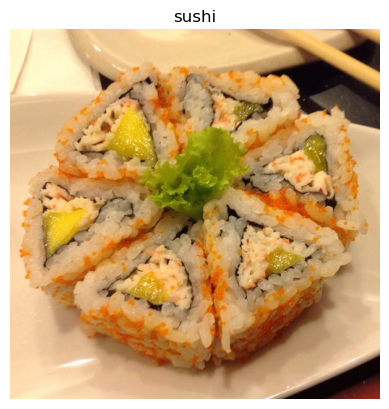

In [17]:
# get some random image and visualize it

import random
import numpy as np

full_img_list = list(image_path.glob('*/*/*.jpg'))

random_img = random.choice(full_img_list)

img = Image.open(random_img)

rand_img_cls = random_img.parent.stem

# turn the image into tensors
rand_img_tensors = np.asarray(random_img)

# Plot the image by matplotlib
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(rand_img_cls)
plt.axis("off")

## Creating a Transfrom Function which converts the image into tensors

In [18]:
from torchvision import transforms

data_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor() 
])

In [19]:
first_img = Image.open(first_img)

In [20]:
first_transformed_image = data_transform(first_img)

In [21]:
first_transformed_image.shape

torch.Size([3, 64, 64])

In [22]:
first_img.size

(384, 512)

## Visualize the difference between transformed iamge and original image

In [28]:
random.seed(42)

def plot_original_and_transformed_image(image_path:list,
                                       transform,
                                       n =6):
    sample_img = random.sample(image_path,k=n)
    
    for img in sample_img:
        with Image.open(img) as f:
            tensor_img = np.asarray(f)
            fig,ax = plt.subplots(nrows = 1,ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original Size: {f.size}")
            ax[0].axis("off")
    
            transformed_img = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"Transformed shape: {transformed_img.shape}")
            ax[1].axis("off")
    
            fig.suptitle(f"Class name: {img.parent.stem}")
    


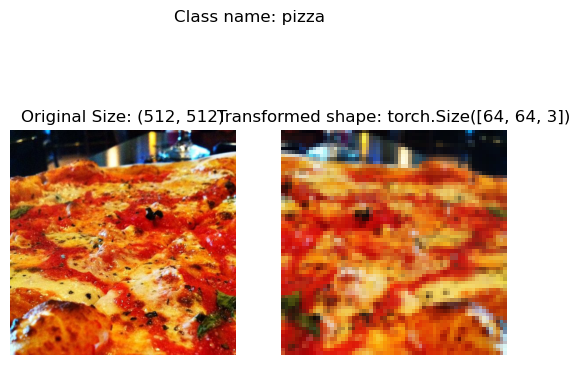

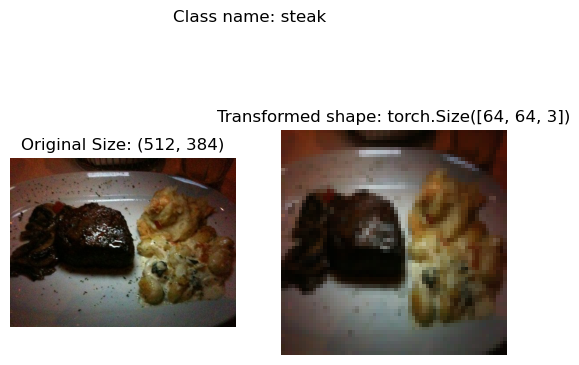

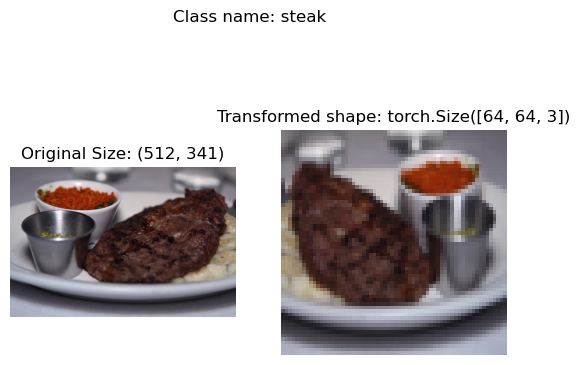

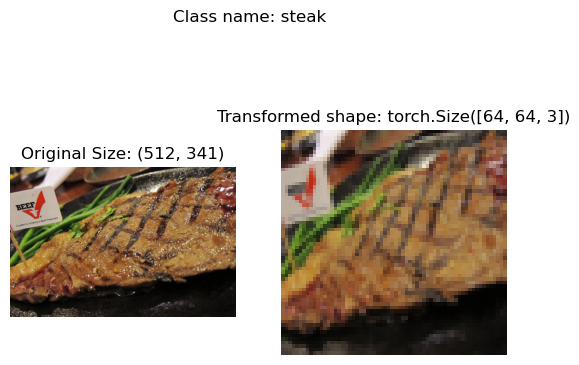

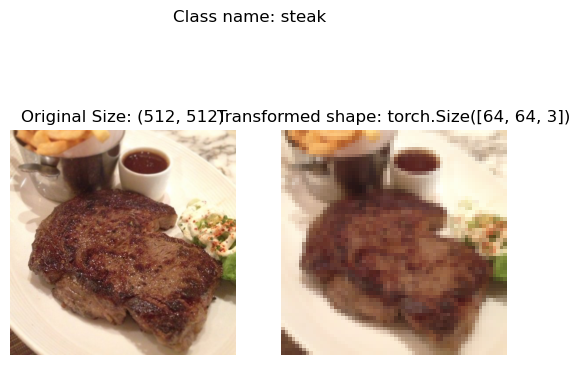

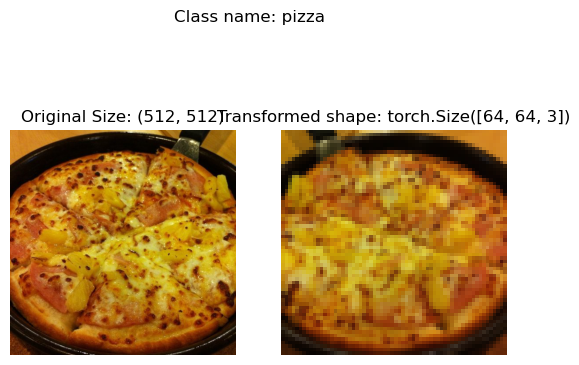

In [29]:
plot_original_and_transformed_image(img_path_list,
                                   data_transform)

## Create the datasets by using `torchvision.datasets.ImageFolder`

In [30]:
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [31]:
from torchvision.datasets import ImageFolder

train_data = ImageFolder(root = train_dir,
                        transform=data_transform,
                        target_transform=None)

test_data = ImageFolder(root = test_dir,
                       transform=data_transform)

In [32]:
train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [33]:
img, label = train_data[0]

In [34]:
img,label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [35]:
train_data.classes

['pizza', 'steak', 'sushi']

In [62]:
train_data.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

## Creating DataLoader

In [63]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             num_workers=8,
                             shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                            batch_size = BATCH_SIZE,
                            num_workers = 8,
                            shuffle= False)

In [64]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x17fed6890>,
 <torch.utils.data.dataloader.DataLoader at 0x3090861d0>)

In [65]:
train_dataloader.batch_size,test_dataloader.batch_size

(32, 32)

In [66]:
img,label = next(iter(train_dataloader))

In [67]:
img.shape,label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## Loading Image with custom data (Without ImageFolder Function)

In [70]:
train_data.classes,train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [75]:
# get the class names
def class_names(dir:list):

    class_names = []

    for files in dir:
        class_names.append(files.parent.stem)

    return list(set(class_names))
    

In [76]:
class_names(img_path_list)

['steak', 'sushi', 'pizza']

In [74]:
l = [1,2,4,2,3,1,2,4]
list(set(l))

[1, 2, 3, 4]

In [84]:
def find_classes(dir:str):

    classes = sorted(entry.name for entry in os.scandir(dir) if entry.is_dir())


    if not classes:
        raise FileNotFoundError(f"The file couldn't find in the target directory")

    class_idx = {class_name: i for i,class_name in enumerate(classes)}

    return classes,class_idx

In [85]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [81]:
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [97]:
from torch.utils.data import Dataset

class own_dataset(Dataset):
    '''
    input: the path of file directory
    path: directory 
    output: A string of dataset, class_names and class_index
    '''
    def __init__(self,
                 image_dir:str,
                 transform=None):
        self.path = list(pathlib.Path(image_dir).glob('*/*.jpg'))
        self.transform = transform
        self.classes,self.class_to_idx = find_classes(image_dir)

    def load_image(self,idx):
        img_path = self.path[idx]
        return Image.open(img_path)

    def __len__(self):
        return len(self.path)

    def __getitem__(self,idx): # work with a single item
        img = self.load_image(idx)
        transformed_img = self.transform(img)
        class_name = self.path[idx].parent.name
        class_idx = self.class_to_idx[class_name]
        return transformed_img,class_idx
        

In [98]:
custom_image_data = own_dataset(train_dir,transform=data_transform)

In [99]:
custom_image_data.classes

['pizza', 'steak', 'sushi']

In [101]:
img, label = custom_image_data[0]

In [102]:
img,label

(tensor([[[0.1255, 0.1333, 0.1294,  ..., 0.9020, 0.8980, 0.8863],
          [0.1961, 0.2039, 0.2039,  ..., 0.9098, 0.9020, 0.8941],
          [0.2627, 0.2667, 0.2902,  ..., 0.9059, 0.9020, 0.8980],
          ...,
          [0.0510, 0.0588, 0.0824,  ..., 0.4353, 0.4431, 0.4471],
          [0.0431, 0.0353, 0.0431,  ..., 0.4314, 0.4275, 0.4314],
          [0.1529, 0.0784, 0.0431,  ..., 0.4196, 0.4196, 0.4314]],
 
         [[0.0824, 0.0902, 0.0863,  ..., 0.9176, 0.9137, 0.8980],
          [0.1216, 0.1333, 0.1294,  ..., 0.9255, 0.9176, 0.9059],
          [0.1686, 0.1765, 0.1961,  ..., 0.9216, 0.9176, 0.9098],
          ...,
          [0.0510, 0.0588, 0.0863,  ..., 0.3373, 0.3412, 0.3333],
          [0.0471, 0.0431, 0.0431,  ..., 0.3333, 0.3294, 0.3216],
          [0.1216, 0.0706, 0.0431,  ..., 0.3294, 0.3255, 0.3137]],
 
         [[0.0431, 0.0510, 0.0510,  ..., 0.8588, 0.8510, 0.8314],
          [0.0745, 0.0824, 0.0824,  ..., 0.8667, 0.8588, 0.8353],
          [0.1137, 0.1059, 0.1255,  ...,

In [104]:
len(custom_image_data),len(train_data)

(225, 225)

In [36]:
custom_image_data.class_to_idx

NameError: name 'custom_image_data' is not defined

In [37]:
from torchvision import transforms

augment_train_transform = transforms.Compose([
    transforms.Resize(size= (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # num_magnitude_bins is the intensity
    # 31 is the highest intensity
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size= (224,224)),
    transforms.ToTensor()
])

In [38]:
image_path

PosixPath('data/pizza_steak_sushi')

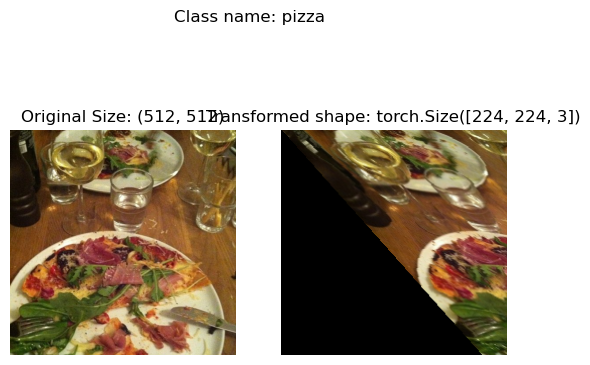

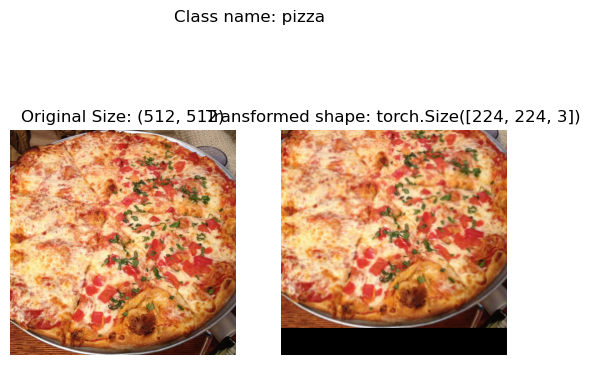

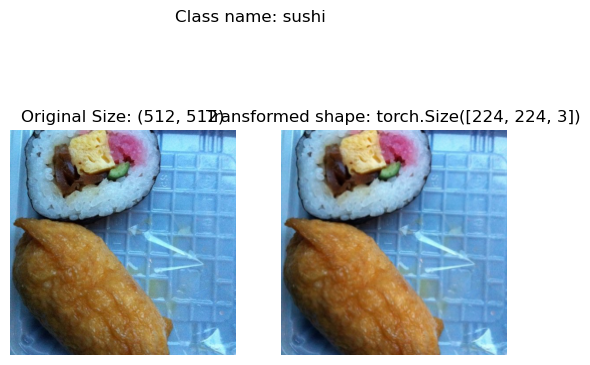

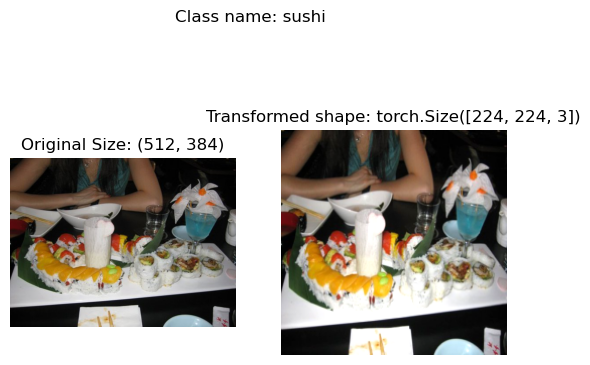

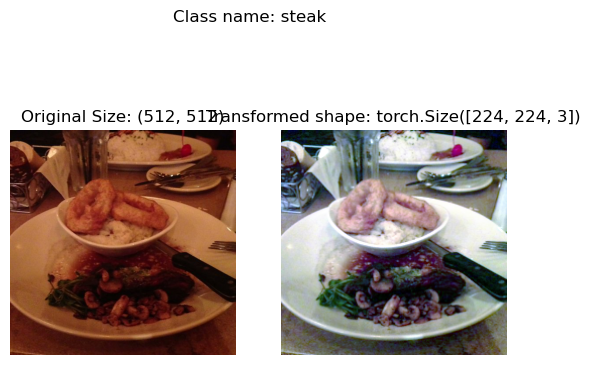

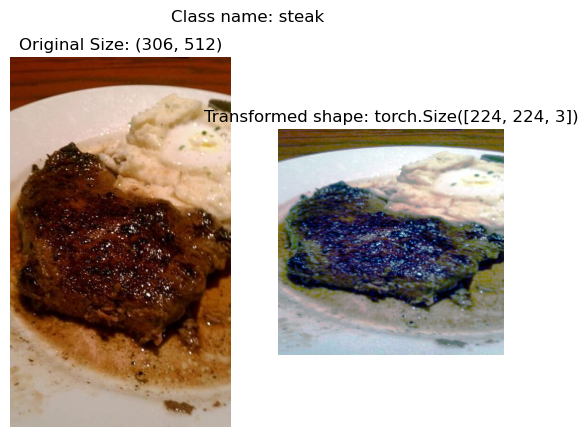

In [39]:
plot_original_and_transformed_image(img_path_list,transform=
                                    augment_train_transform)